In [43]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [44]:
parent = os.path.join(Path(os.getcwd()).parent)

sys.path.append(parent)

from utils.results import SimulationResults

In [45]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [46]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Load in datasets of different modelling runs.

In [47]:
# load in the modelling results
# results_folder = Path(r"P:\11210070-usgscoop-202324-arcticxb\runs\val_gt1")

runid2 = 'val_gt24'
runid3 = 'val_gt24'
runid4 = 'val_gt24'

fname_gt2 = "data/" + runid2 + "_ground_temperature_timeseries.csv"
fname_gt3 = "data/" + runid3 + "_ground_temperature_timeseries.csv"
fname_gt4 = "data/" + runid4 + "_ground_temperature_timeseries.csv"

# df_model = pd.read_csv(os.path.join(results_folder, fname), parse_dates=['time'])
df_gt2 = pd.read_csv(fname_gt2, parse_dates=['time'])
df_gt3 = pd.read_csv(fname_gt3, parse_dates=['time'])
df_gt4 = pd.read_csv(fname_gt4, parse_dates=['time'])

# Lets add some columns to convert to Celcius
colnames = ['temp_0.0m[K]', 'temp_0.5m[K]', 'temp_1.0m[K]', 'temp_2.0m[K]', 'temp_2.95m[K]']

for df in [df_gt2, df_gt3, df_gt4]:
    for colname in colnames:
        
        df[f'{colname[:-3]}[C]'] = df[colname] - 273.15

df_gt2.head()

,Unnamed: 0,time,air_temp[K],temp_0.0m[K],temp_0.25m[K],temp_0.5m[K],temp_0.75m[K],temp_1.0m[K],temp_1.25m[K],temp_1.5m[K],...,total_heat_flux[W/m2],long_wave_radiation_flux[W/m2],solar_radiation_flux[W/m2],latent_heat_flux[W/m2],convective_heat_flux[W/m2],temp_0.0m[C],temp_0.5m[C],temp_1.0m[C],temp_2.0m[C],temp_2.95m[C]
0,0,2011-01-01 00:00:00,247.379488,266.044545,266.044545,266.045859,266.124737,266.225858,265.788907,265.133481,...,0.000000,0.000000,0.0,0.000000,0.000000,-7.105455,-7.104141,-6.924142,-9.093462,-10.017834
1,1,2011-01-01 01:00:00,247.379488,256.447249,265.976788,266.052415,266.124746,266.184290,265.788650,265.133481,...,-962.573173,-13.164846,0.0,-7.025107,-942.383220,-16.702751,-7.097585,-6.965710,-9.076001,-10.005053
2,2,2011-01-01 02:00:00,247.560030,252.882956,265.674225,266.056980,266.124720,266.153831,265.787300,265.133481,...,-563.998679,-12.339870,0.0,-6.964844,-544.693965,-20.267044,-7.093020,-6.996169,-9.063007,-9.995060
3,3,2011-01-01 03:00:00,247.865404,251.607971,265.180867,266.059215,266.124494,266.130091,265.784663,265.133481,...,-385.745012,-8.263931,0.0,-6.950936,-370.530144,-21.542029,-7.090785,-7.019909,-9.052752,-9.986869
4,4,2011-01-01 04:00:00,248.032535,251.092869,264.594434,266.057417,266.123896,266.110478,265.780929,265.133478,...,-306.095707,-9.039967,0.0,-6.844316,-290.211424,-22.057131,-7.092583,-7.039522,-9.044199,-9.979851


Load in measured data.

In [48]:
# load in Erikson data
df_erikson = pd.read_csv(
    os.path.join(parent, Path(r"database\raw_datasets\erikson\Groundtemperatu\BTI_2011TimeSeriesData_GroundTemperature.csv")),
    )

# parse dates
df_erikson['time'] = pd.to_datetime(df_erikson[["year", "month", "day", "hour", "minute"]])

# only keep data from site BL01, BL02, BL03, BL04 (these are the ones on the center bottom dataset)
site_ids = ['BL01', 'BL02', 'BL03', 'BL04']
df_erikson = df_erikson[df_erikson['SiteID'].isin(site_ids)]

# lets have a look
display(df_erikson.head())
display(df_erikson.tail())

,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,time
0,BL01,HOBO,-143.77901,70.08405,2011,7,8,7,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 07:00:00
1,BL01,HOBO,-143.77901,70.08405,2011,7,8,8,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 08:00:00
2,BL01,HOBO,-143.77901,70.08405,2011,7,8,9,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 09:00:00
3,BL01,HOBO,-143.77901,70.08405,2011,7,8,10,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 10:00:00
4,BL01,HOBO,-143.77901,70.08405,2011,7,8,11,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 11:00:00


,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,time
7878,BL04,HOBO,-143.77947,70.084211,2011,9,28,15,0,-0.5,NaN,NaN,-0.5,NaN,-0.5,-0.5,NaN,NaN,NaN,2011-09-28 15:00:00
7879,BL04,HOBO,-143.77947,70.084211,2011,9,28,16,0,-0.5,NaN,NaN,-0.4,NaN,-0.5,-0.5,NaN,NaN,NaN,2011-09-28 16:00:00
7880,BL04,HOBO,-143.77947,70.084211,2011,9,28,17,0,-0.4,NaN,NaN,-0.3,NaN,-0.4,-0.4,NaN,NaN,NaN,2011-09-28 17:00:00
7881,BL04,HOBO,-143.77947,70.084211,2011,9,28,18,0,-0.2,NaN,NaN,-0.1,NaN,-0.1,-0.2,NaN,NaN,NaN,2011-09-28 18:00:00
7882,BL04,HOBO,-143.77947,70.084211,2011,9,28,19,0,0.9,NaN,NaN,1.5,NaN,1.5,1.2,NaN,NaN,NaN,2011-09-28 19:00:00


In [49]:
# Let's for now stick with only BL01
df_erikson = df_erikson[df_erikson['SiteID'].isin(['BL01'])]

df_erikson.head()
print(df_erikson.columns)

Index(['SiteID', 'Instrument', 'Longitude', 'Latitude', 'year', 'month', 'day',
       'hour', 'minute', 'Tair', 'T10cm', 'T15cm', 'T30cm', 'T50cm', 'T60cm',
       'T90cm', 'T100cm', 'T200cm', 'T295cm', 'time'],
      dtype='object')


In [50]:
# make sure we're looking at the correct time frame
t_start = df_erikson.time.values[0]
t_end = df_erikson.time.values[-1]

for df in [df_gt2, df_gt3, df_gt4]:
    mask = (df['time'] >= t_start) * (df['time'] <= t_end)    
    df = df[mask]

Plot temperature at different layers for different modelling runs, combined with the measured data.

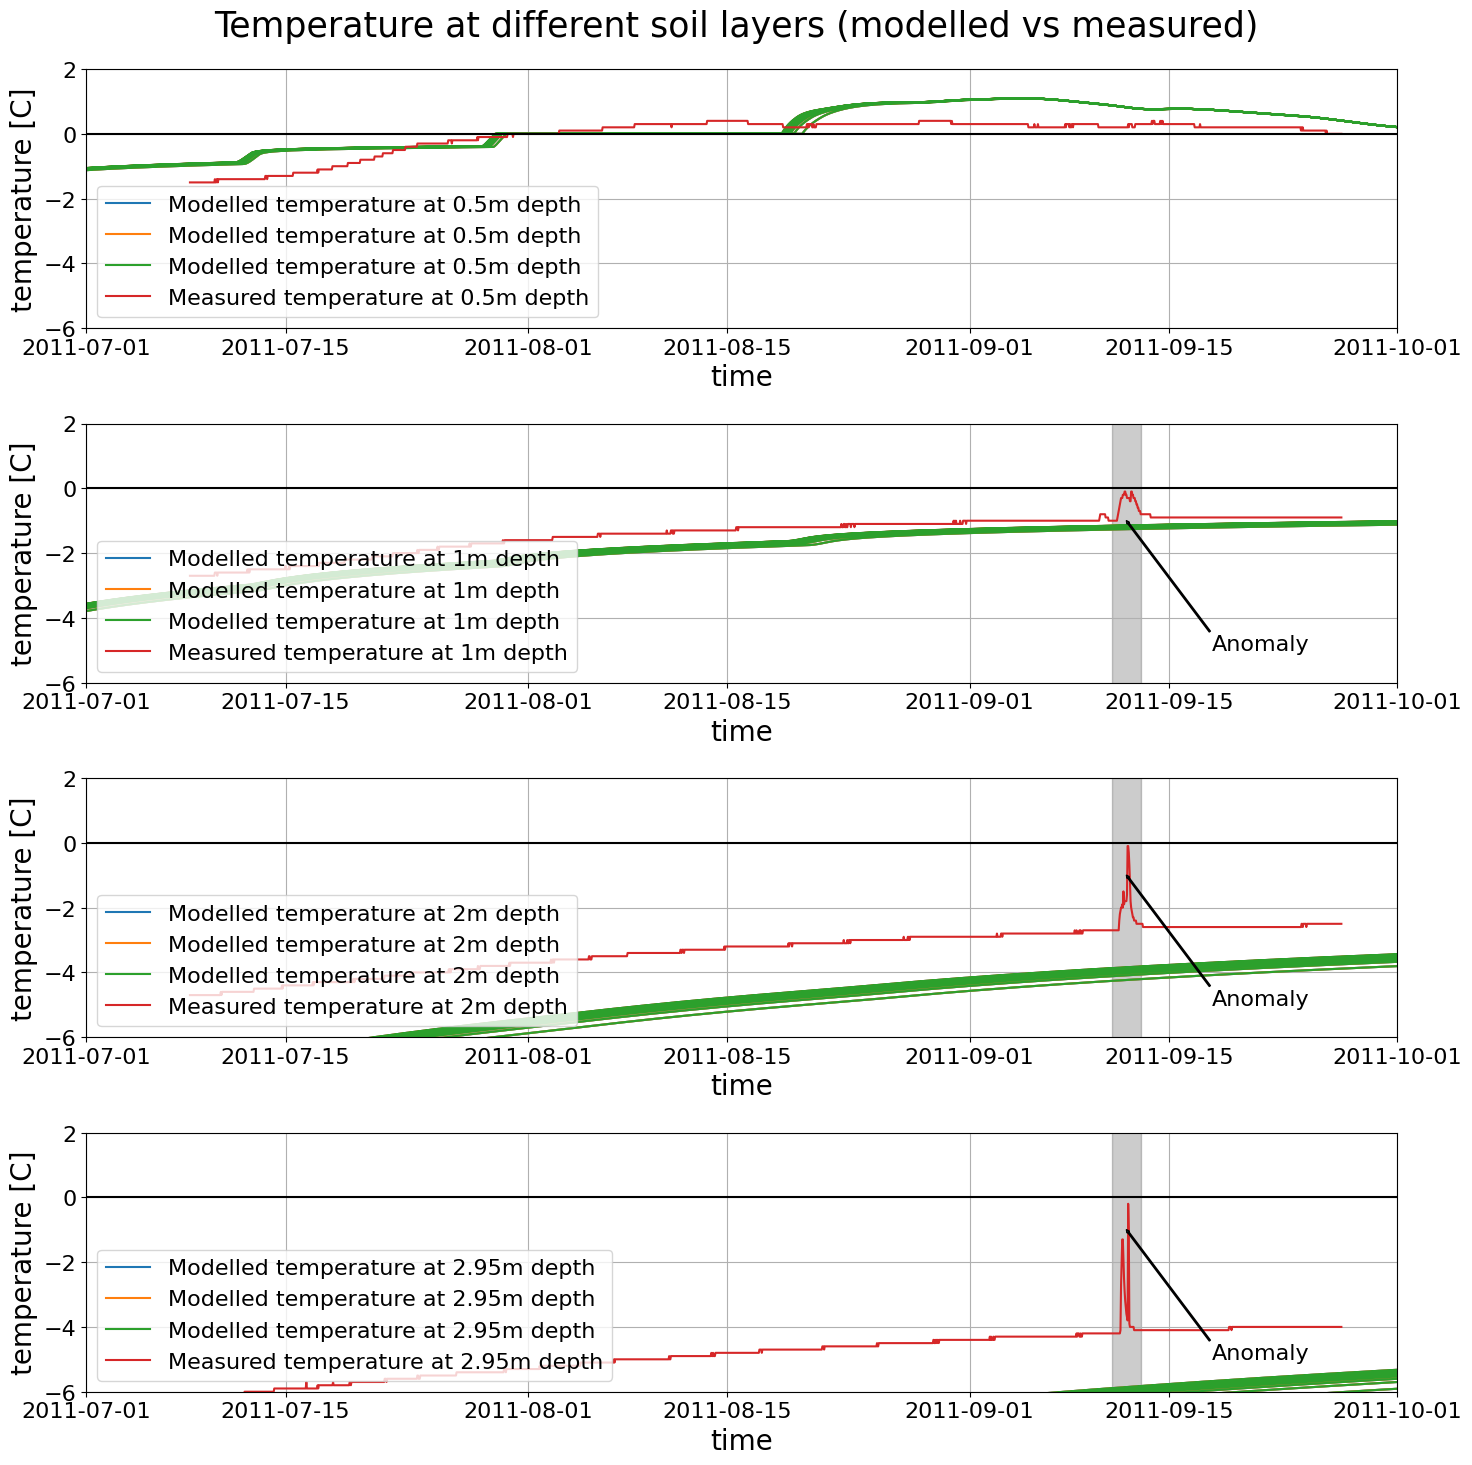

In [51]:
fig, axs = plt.subplots(4, 1, figsize=(15, 15))

# ax0, ax1, ax2, ax3, ax4 = axs
ax1, ax2, ax3, ax4 = axs

ax2.fill_between([pd.Timestamp('2011-09-11'), pd.Timestamp('2011-09-13')], -50, 50, alpha=0.2, color='k')
ax2.annotate("Anomaly", (pd.Timestamp('2011-09-12'), -1), xytext=(pd.Timestamp('2011-09-18'), -5), arrowprops={'width':1, 'headwidth':2, 'headlength':2})
ax3.fill_between([pd.Timestamp('2011-09-11'), pd.Timestamp('2011-09-13')], -50, 50, alpha=0.2, color='k')
ax3.annotate("Anomaly", (pd.Timestamp('2011-09-12'), -1), xytext=(pd.Timestamp('2011-09-18'), -5), arrowprops={'width':1, 'headwidth':2, 'headlength':2})
ax4.fill_between([pd.Timestamp('2011-09-11'), pd.Timestamp('2011-09-13')], -50, 50, alpha=0.2, color='k')
ax4.annotate("Anomaly", (pd.Timestamp('2011-09-12'), -1), xytext=(pd.Timestamp('2011-09-18'), -5), arrowprops={'width':1, 'headwidth':2, 'headlength':2})
# ax3.fill_between([pd.Timestamp('2011-07-11'), pd.Timestamp('2015-07-05')], -50, 50, alpha=0.2, label='Anomaly', color='k')
# ax4.fill_between([pd.Timestamp('2011-08-27'), pd.Timestamp('2018-07-30')], -50, 50, alpha=0.2, label='Anomaly', color='k')

# ax0.plot(df_gt2['time'], df_gt2['temp_0.0m[C]'], label=f'{runid2} temperature at surface')
# ax0.plot(df_gt3['time'], df_gt3['temp_0.0m[C]'], label=f'{runid3} temperature at surface')
# ax0.plot(df_gt4['time'], df_gt4['temp_0.0m[C]'], label=f'{runid4} temperature at surface')

ax1.plot(df_gt2['time'], df_gt2['temp_0.5m[C]'], label=f'Modelled temperature at 0.5m depth')
ax1.plot(df_gt3['time'], df_gt3['temp_0.5m[C]'], label=f'Modelled temperature at 0.5m depth')
ax1.plot(df_gt4['time'], df_gt4['temp_0.5m[C]'], label=f'Modelled temperature at 0.5m depth')
ax1.plot(df_erikson['time'], df_erikson['T50cm'], label='Measured temperature at 0.5m depth')

ax2.plot(df_gt2['time'], df_gt2['temp_1.0m[C]'], label=f'Modelled temperature at 1m depth')
ax2.plot(df_gt3['time'], df_gt3['temp_1.0m[C]'], label=f'Modelled temperature at 1m depth')
ax2.plot(df_gt4['time'], df_gt4['temp_1.0m[C]'], label=f'Modelled temperature at 1m depth')
ax2.plot(df_erikson['time'], df_erikson['T100cm'], label='Measured temperature at 1m depth')

ax3.plot(df_gt2['time'], df_gt2['temp_2.0m[C]'], label=f'Modelled temperature at 2m depth')
ax3.plot(df_gt3['time'], df_gt3['temp_2.0m[C]'], label=f'Modelled temperature at 2m depth')
ax3.plot(df_gt4['time'], df_gt4['temp_2.0m[C]'], label=f'Modelled temperature at 2m depth')
ax3.plot(df_erikson['time'], df_erikson['T200cm'], label='Measured temperature at 2m depth')

ax4.plot(df_gt2['time'], df_gt2['temp_2.95m[C]'], label=f'Modelled temperature at 2.95m depth')
ax4.plot(df_gt3['time'], df_gt3['temp_2.95m[C]'], label=f'Modelled temperature at 2.95m depth')
ax4.plot(df_gt4['time'], df_gt4['temp_2.95m[C]'], label=f'Modelled temperature at 2.95m depth')
ax4.plot(df_erikson['time'], df_erikson['T295cm'], label='Measured temperature at 2.95m depth')



for ax in axs:
    
    # if not ax==ax0:
    ax.set_ylim((-6, 2))
    ax.set_xlim((pd.to_datetime("2011-07-01"), pd.to_datetime("2011-10-01")))

    ax.legend(loc='lower left')
    ax.set_xlabel('time')
    ax.set_ylabel('temperature [C]')
    ax.axhline(0, label='Tm', color='k')
    ax.grid()

fig.suptitle("Temperature at different soil layers (modelled vs measured)")

fig.tight_layout()

plt.show()

(array([    0,  8760, 17520, 26280, 35040, 43800, 52560, 61320, 70080,
       78840]),)
78840


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_19616\1970780605.py:73: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


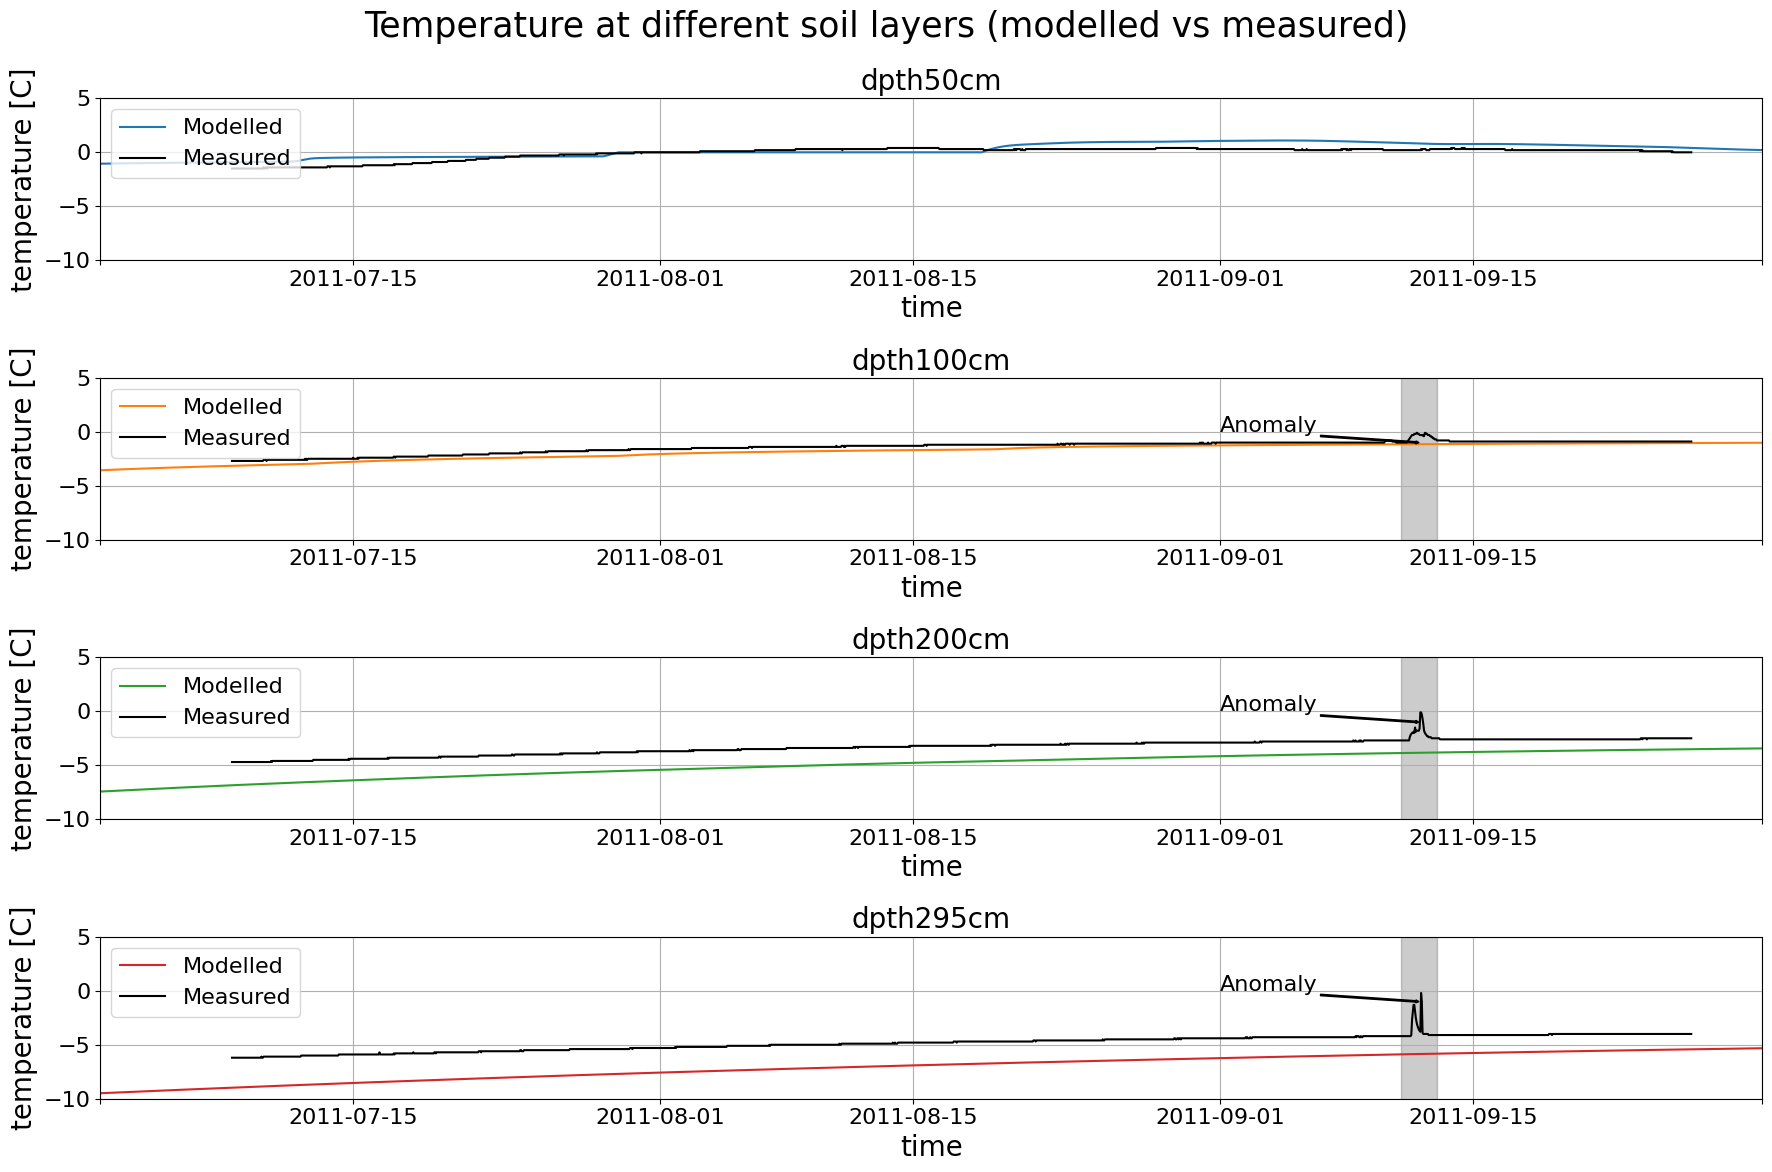

In [59]:
fig, axs = plt.subplots(4, 1, figsize=(18, 12))

ax1, ax2, ax3, ax4 = axs

start_last_year_indices = np.max(np.nonzero(df_gt2.time.values == pd.to_datetime("2011-01-01")))
print(np.nonzero(df_gt2.time.values == pd.to_datetime("2011-01-01")))
print(start_last_year_indices)
df_gt = df_gt2.iloc[start_last_year_indices:]

# add patches for anomaly
ax2.fill_between([pd.Timestamp('2011-09-11'), pd.Timestamp('2011-09-13')], -50, 50, alpha=0.2, color='k')
ax2.annotate("Anomaly", (pd.Timestamp('2011-09-12'), -1), xytext=(pd.Timestamp('2011-09-01'), 0), arrowprops={'width':1, 'headwidth':2, 'headlength':2})
ax3.fill_between([pd.Timestamp('2011-09-11'), pd.Timestamp('2011-09-13')], -50, 50, alpha=0.2, color='k')
ax3.annotate("Anomaly", (pd.Timestamp('2011-09-12'), -1), xytext=(pd.Timestamp('2011-09-01'), 0), arrowprops={'width':1, 'headwidth':2, 'headlength':2})
ax4.fill_between([pd.Timestamp('2011-09-11'), pd.Timestamp('2011-09-13')], -50, 50, alpha=0.2, color='k')
ax4.annotate("Anomaly", (pd.Timestamp('2011-09-12'), -1), xytext=(pd.Timestamp('2011-09-01'), 0), arrowprops={'width':1, 'headwidth':2, 'headlength':2})

ax1.set_title('dpth50cm')
ax1.plot(df_gt['time'], df_gt['temp_0.5m[C]'], 'C0', label=f'Modelled')
ax1.plot(df_erikson['time'], df_erikson['T50cm'], 'k', label='Measured')

ax2.set_title('dpth100cm')
ax2.plot(df_gt['time'], df_gt['temp_1.0m[C]'], 'C1', label=f'Modelled')
ax2.plot(df_erikson['time'], df_erikson['T100cm'], 'k', label='Measured')

ax3.set_title('dpth200cm')
ax3.plot(df_gt['time'], df_gt['temp_2.0m[C]'], 'C2', label=f'Modelled')
ax3.plot(df_erikson['time'], df_erikson['T200cm'], 'k', label='Measured')

ax4.set_title('dpth295cm')
ax4.plot(df_gt['time'], df_gt['temp_2.95m[C]'], 'C3', label=f'Modelled')
ax4.plot(df_erikson['time'], df_erikson['T295cm'], 'k', label='Measured')

for ax in axs:
    
    ax.set_xlim((pd.to_datetime("2011-07-01"), pd.to_datetime("2011-10-01")))
    ax.set_ylim((-10, 5))
    
    ax.set_xticks([
        pd.to_datetime("2011-7-01"),

        pd.to_datetime("2011-7-15"),
        pd.to_datetime("2011-8-01"),
        pd.to_datetime("2011-8-15"),
        pd.to_datetime("2011-9-01"),
        pd.to_datetime("2011-9-15"),
        
        pd.to_datetime("2011-10-01"),

    ],
    [   
        None,
        "2011-07-15",
        "2011-08-01",
        "2011-08-15",
        "2011-09-01",
        "2011-09-15",
        None
    ]
    )
    
    ax.legend(loc='upper left')
    ax.set_xlabel('time')
    ax.set_ylabel('temperature [C]')
    ax.grid()

fig.suptitle("Temperature at different soil layers (modelled vs measured)")

fig.tight_layout()

fig.savefig(os.path.join(save_path, 'rmse_validation_a.png'), bbox_inches='tight', facecolor='white', transparent=False)

fig.show()

In [53]:
def compute_RMSE(run_id, df_val_data):
    
    # load in the modelling results
    fname_model_data = "data/" + run_id + "_ground_temperature_timeseries.csv"

    df_gt = pd.read_csv(fname_model_data, parse_dates=['time'])

    # Lets add some columns to convert to Celcius
    colnames = ['temp_0.0m[K]', 'temp_0.5m[K]', 'temp_1.0m[K]', 'temp_2.0m[K]', 'temp_2.95m[K]']

    for colname in colnames:
        
        df_gt[f'{colname[:-3]}[C]'] = df_gt[colname] - 273.15
        
    # remove repeated years from model data
    indice = np.max(df_gt[df_gt.time == df_gt.time.values[0]].index)
    df_gt = df_gt[df_gt.index >= indice]
        
    # make sure both dataframes span the same time frame
    t_start = np.max((df_gt.time.values[0], df_val_data.time.values[0]))
    t_end = np.min((df_gt.time.values[-1], df_val_data.time.values[-1]))

    mask1 = (df_gt['time'] >= t_start) * (df_gt['time'] <= t_end)    
    df1 = df_gt[mask1]

    mask2 = (df_val_data['time'] >= t_start) * (df_val_data['time'] <= t_end)    
    df2 = df_val_data[mask2]
    
    # compute RMSE per soil layer
    colnames1 = ['temp_0.5m[C]', 'temp_1.0m[C]', 'temp_2.0m[C]', 'temp_2.95m[C]']
    colnames2 = ['T50cm', 'T100cm', 'T200cm', 'T295cm']
    
    RMSEs = {'runid':run_id}
    
    for c1, c2 in zip(colnames1, colnames2):
        
        values1 = df1[c1].values
        values2 = df2[c2].values
        
        N = len(values1)
        
        RMSE = 1 / N * np.sum((values1 - values2)**2)
        
        RMSEs[c2] = RMSE
        
    return RMSEs

{'runid': 'val_gt24', 'T50cm': np.float64(0.261332241067765), 'T100cm': np.float64(0.12975915659467696), 'T200cm': np.float64(2.37132071723472), 'T295cm': np.float64(4.477646015892579)}


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_19616\4219963439.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


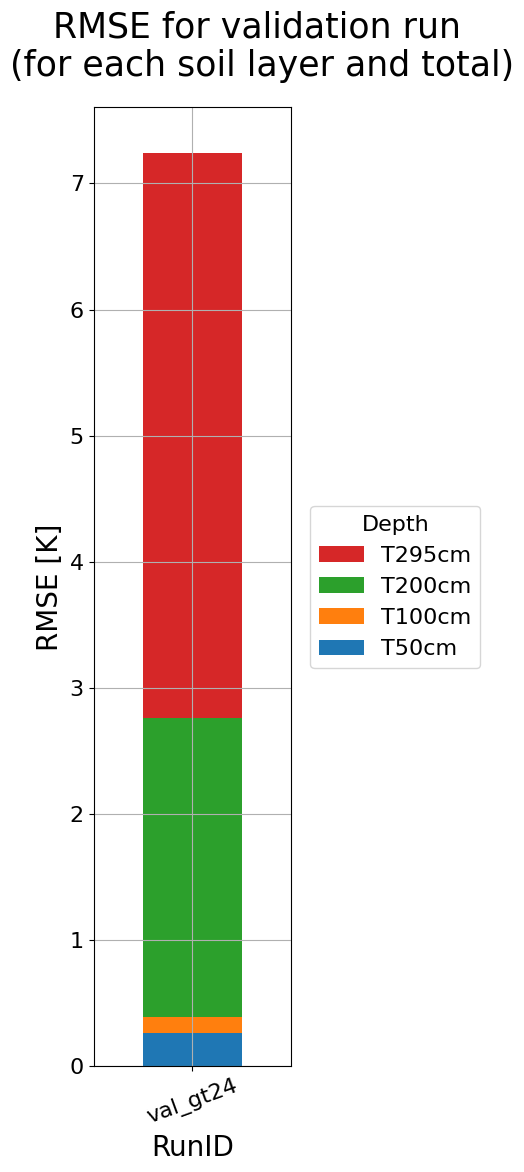

In [54]:
BEST_RUN_ID = "val_gt24"

data = compute_RMSE(BEST_RUN_ID, df_erikson)

print(data)

df_rmse_val = pd.DataFrame(data, index=[0])

fig, ax = plt.subplots(figsize=(5, 12))

df_rmse_val.plot.bar(stacked=True, ax=ax, color=['C0', 'C1', 'C2', 'C3'])

fig.suptitle("RMSE for validation run \n(for each soil layer and total)")
ax.set_xlabel('RunID')
ax.set_ylabel('RMSE [K]')

ax.set_xticks(np.arange(len(df_rmse_val)), df_rmse_val.runid.values)
# ax.set_xticklabels(df_rmse_val.runid.values, rotation=20)

ax.grid()

handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels), title='Depth', bbox_to_anchor=(1.04, 0.5), loc="center left")

fig.tight_layout()

fig.show()

fig.savefig(os.path.join(save_path, 'rmse_validation_c.png'), bbox_inches='tight', facecolor='white', transparent=False)

create x=y plot for this run as well

1940
1940


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_19616\3777515172.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


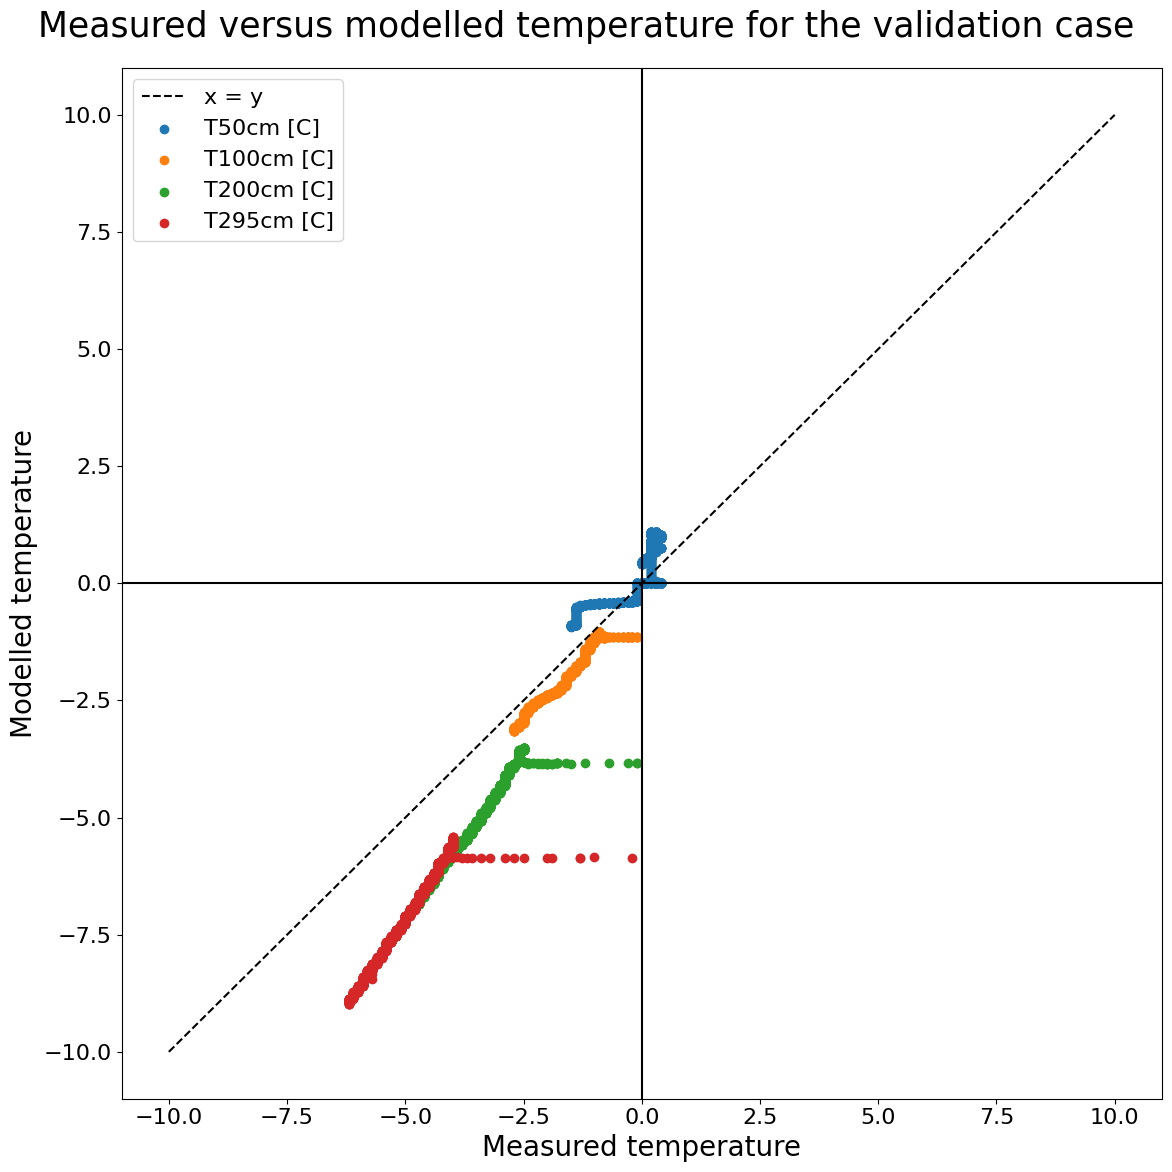

In [55]:

# make sure both dataframes span the same time frame
t_start = np.max((df_gt.time.values[0], df_erikson.time.values[0]))
t_end = np.min((df_gt.time.values[-1], df_erikson.time.values[-1]))

mask1 = (df_gt['time'] >= t_start) * (df_gt['time'] <= t_end)    
df_model = df_gt[mask1]

mask2 = (df_erikson['time'] >= t_start) * (df_erikson['time'] <= t_end)    
df_measured = df_erikson[mask2]

print(len(df_model))
print(len(df_measured))

# create figure
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100), 'k--', label='x = y')
ax.axhline(0, color='k')
ax.axvline(0, color='k')

# with different colors for different layers
ax.scatter(df_measured['T50cm'], df_model['temp_0.5m[C]'], color='C0', label='T50cm [C]')
ax.scatter(df_measured['T100cm'], df_model['temp_1.0m[C]'], color='C1', label='T100cm [C]')
ax.scatter(df_measured['T200cm'], df_model['temp_2.0m[C]'], color='C2', label='T200cm [C]')
ax.scatter(df_measured['T295cm'], df_model['temp_2.95m[C]'], color='C3', label='T295cm [C]')

ax.set_xlabel("Measured temperature")
ax.set_ylabel("Modelled temperature")

fig.suptitle("Measured versus modelled temperature for the validation case")

ax.legend()

fig.tight_layout()

fig.show()

fig.savefig(os.path.join(save_path, 'rmse_validation_b.png'), bbox_inches='tight', facecolor='white', transparent=False)

In [56]:
df_rmse = pd.DataFrame(columns=['runid'] + ['T50cm', 'T100cm', 'T200cm', 'T295cm'])

for run_number in np.arange(1, 14, 1):
    
    run_id = 'val_gt' + str(run_number)

    RMSEs = compute_RMSE(run_id, df_erikson)
    
    df_rmse = df_rmse._append(RMSEs, ignore_index=True)

KeyError: 'temp_0.0m[K]'

In [44]:
display(df_rmse)

,runid,T50cm,T100cm,T200cm,T295cm
0,val_gt1,0.186831,1.164719,6.775517,11.382626
1,val_gt2,0.167056,0.030404,0.031095,0.078404
2,val_gt3,0.154905,0.024214,0.028975,0.084655
3,val_gt4,0.177685,0.032759,0.031957,0.077393
4,val_gt5,0.136359,0.020315,0.027427,0.087872
5,val_gt6,0.149359,0.018616,0.026461,0.095417
6,val_gt7,0.183337,0.025002,0.027415,0.095062
7,val_gt8,0.296225,0.037239,0.031247,0.105287
8,val_gt9,0.378297,0.038644,0.031590,0.106858
9,val_gt10,0.302903,0.030664,0.028605,0.101062


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_3044\2822456311.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


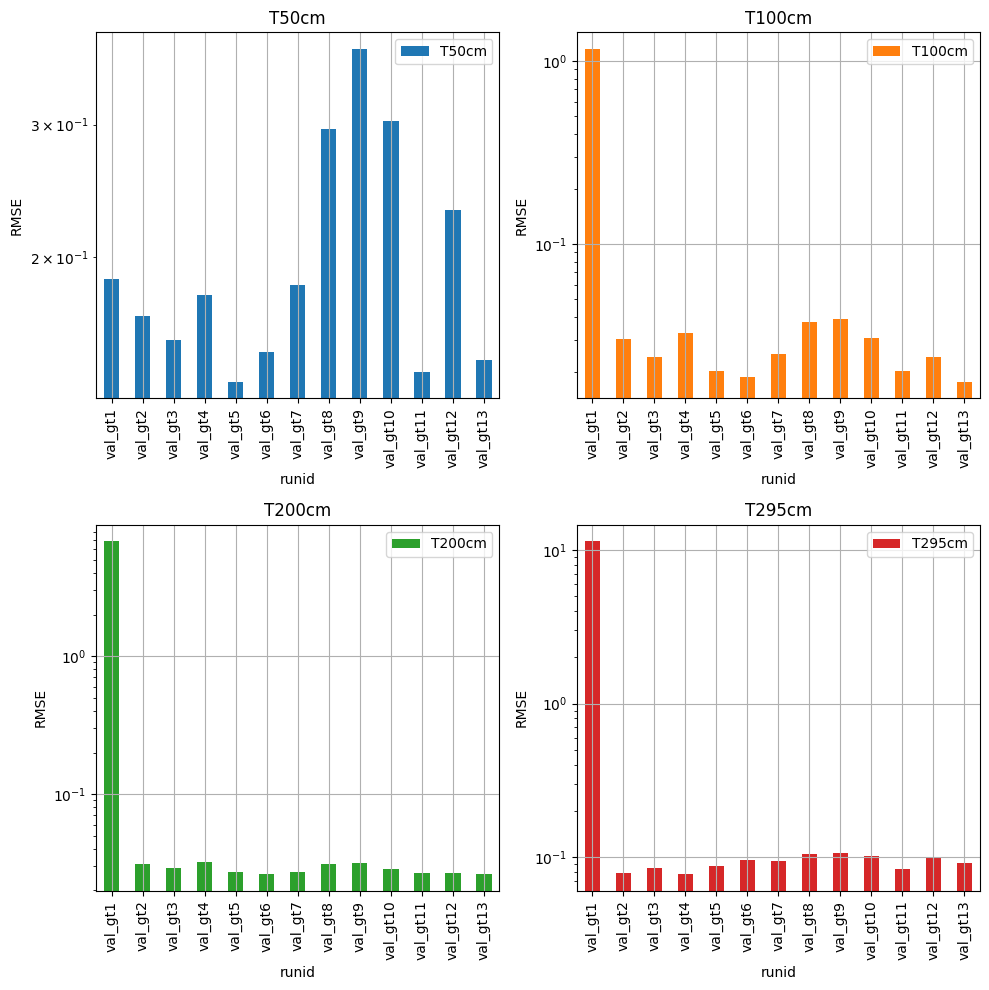

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

df_rmse.plot.bar(subplots=True, ax=axs, logy=True)

for array in axs:
    for ax in array:
        ax.set_xticks(np.arange(len(df_rmse)), df_rmse.runid.values)
        
        ax.set_xlabel('runid')
        ax.set_ylabel('RMSE')
        
        ax.grid()

fig.tight_layout()
fig.show()
    